# Crab Age Prediction

**Project Group:**
| Name                       | Email                                 | Student              |
| -------------------------- | ------------------------------------- | -------------------- |
| Brian Lucero               | 13rianlucero@csu.fullerton.edu        | Undergraduate        |
| Justin Heng                | justinheng@csu.fullerton.edu          | Graduate             |


## Jupyter Notebook:
----------------------------------------------------------------------------------------------------------------------------------

## Overview
1. **Abstract**
    - Paper Summary
2. **Introduction**
    - The problem 
    - Why it's important 
    - Key method and strategy
3. **Background**
    - Technologies & ideas used to build our method
4. **Methods**
    - Approach to solving the problem
    - Key contributions
        - from Justin
        - from Brian
5. **Experiments**
    - Description of ML process workflow 
        - Featuring the project source code to compliment the experiment process description 
6. **Conclusion**
    - Summary of contributions & results
    - Future work
7. **References**
    - All of our project resources

## Abstract
> Machine learning can be used to predict the age of crabs. It can be more accurate than simply weighing a crab to estimate its age. Several different models can be used, though support vector regression was found to be the most accurate in this experiment.


## Introduction
> Crab is very tasty and many countries of the world import huge amounts of crabs for consumption every year. The main benefits of crab farming are, labor cost is very low, production cost is comparatively lower and they grow very fast. Commercial crab farming business is developing the lifestyle of the people of coastal areas. By proper care and management we can earn more from crab farming business than shrimp farming. You can raise mud crabs in two systems. Grow out farming and fattening systems. For a commercial crab farmer knowing the right age of the crab helps them decide if and when to harvest the crabs. Beyond a certain age, there is negligible growth in crab's physical characteristics and hence, it is important to time the harvesting to reduce cost and increase profit.

## Background
**Technologies used:**
> - K-Nearest Neighbours (KNN) - Machine Learning Model
> - Multiple Linear Regression - Machine Learning Model
> - Support Vector Machine (SVM) - Machine Learning Model
> - Feature Selection & Representation
> - Evaluation on variety of methods
> - Method Selection
> - Parameter Tuning
> - Classifier Evaluation
> - Train-Test Split
> - Cross Validation




----------------------------------------------------------------------------------------------------------------------------------

# About data
We have our dataset publicly available on [Kaggle](https://www.kaggle.com/sidhus/crab-age-prediction). The dataset has following columns - 

- Sex : Gender of crab (Male and Female)
- Length : Lenght of crab in 
- Diameter : Diameter of crab in 
- Height : Height of crab in 
- Weight : Weight of crab in 
- Shucked Weight : Weight of crab without shell
- Viscera Weight : is weight that wraps around your abdominal organs deep inside body
- Shell Weight : Weight of shell
- Age : Age of crab in months



## Importing required libraries

In [ ]:
## IMPORT THE LIBRARIES
## ----------------------------------------------------------------------------------------
import pandas
import numpy
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

: 

## Import the Dataset
> 
> `Read in (.csv) dataset file`
> `Build the dataframe variable named "data"`
> 

In [2]:
## IMPORT THE DATA INTO A STRUCTURE:
## ----------------------------------------------------------------------------------------
data = pandas.read_csv(r"CrabAgePrediction.csv").dropna(axis=0)
print(data.columns)

## Create a NEW SexValue Column in dataframe
> (set to 0 by default)

In [ ]:
## ----------------------------------------------------------------------------------------
data["SexValue"] = 0 
print(data.columns)

# Convert the Male/Female Values to Numerical Values
> This is so they may be used in dataset.

In [ ]:
## CONVERT THE MALE/FEMALE VALUES TO NUMERICAL VALUES:
## ----------------------------------------------------------------------------------------
for index, row in data.iterrows():
    #convert male or female to a numerical value     Male=1, Female=2, Indeterminate=1.5
    if row["Sex"] == "M":
        data.iloc[index, 9] = 1
    elif row["Sex"] == "F":
        data.iloc[index, 9] = 2
    else:
        data.iloc[index, 9] = 1.5

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [4]:
crab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [5]:
crab_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


# Exploratory data analysis
Let us perform the basic exploration on the dataset and figure out relationships between various columns / features with Age

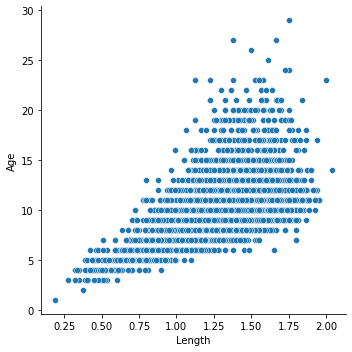

In [6]:
sns.relplot(x = "Length", y = "Age", data = crab_df)

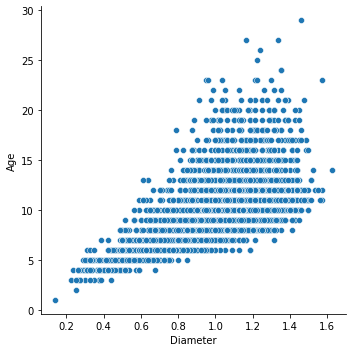

In [7]:
sns.relplot(x = "Diameter", y = "Age", data = crab_df)

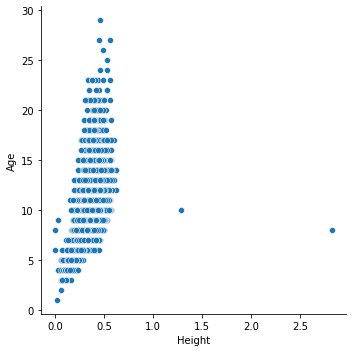

In [8]:
sns.relplot(x = "Height", y = "Age", data = crab_df)

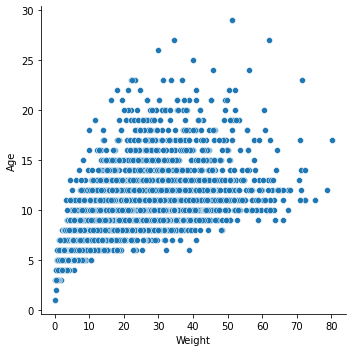

In [9]:
sns.relplot(x = "Weight", y = "Age", data = crab_df)

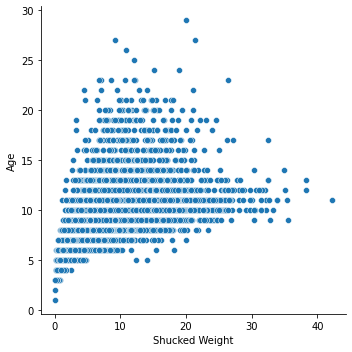

In [10]:
sns.relplot(x = "Shucked Weight", y = "Age", data = crab_df)

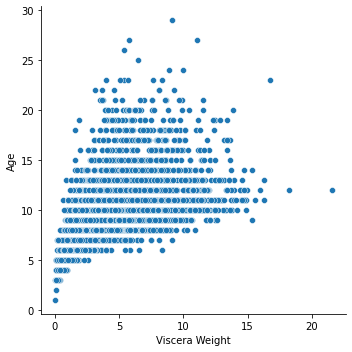

In [11]:
sns.relplot(x = "Viscera Weight", y = "Age", data = crab_df)

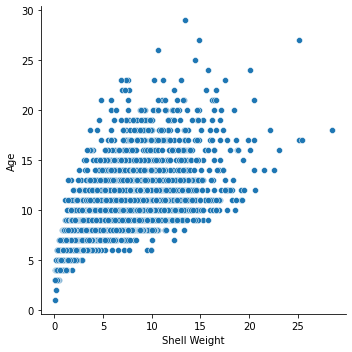

In [12]:
sns.relplot(x = "Shell Weight", y = "Age", data = crab_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

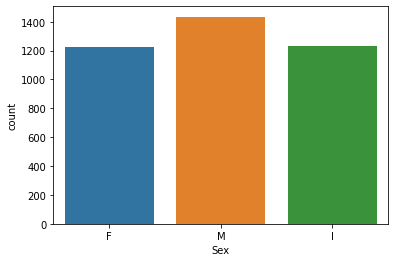

In [13]:
sns.countplot(x = "Sex", data = crab_df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

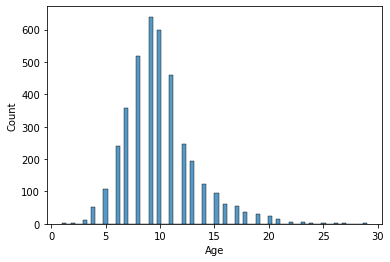

In [14]:
sns.histplot(data = crab_df, x = "Age")

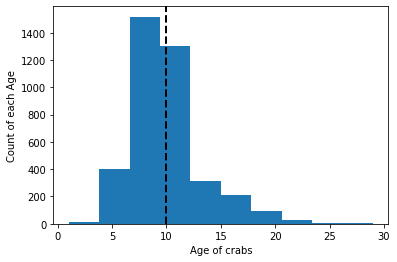

In [15]:
plt.hist(crab_df["Age"]);
plt.axvline(crab_df["Age"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel("Age of crabs")
plt.ylabel("Count of each Age")

plt.show()

<AxesSubplot:>

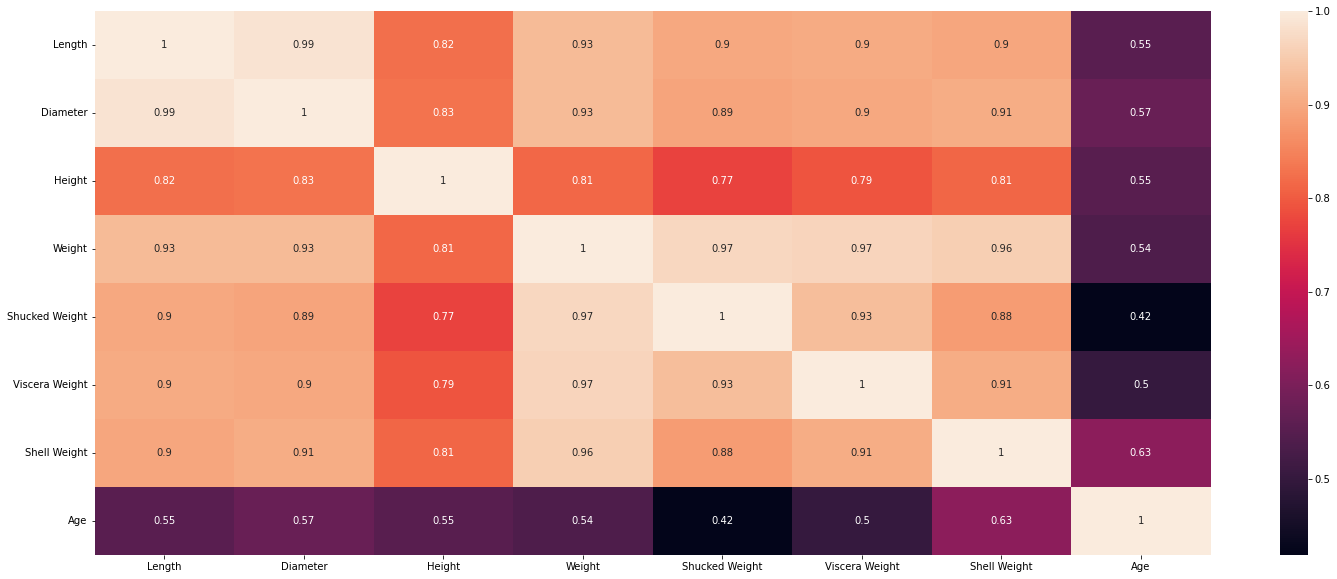

In [16]:
plt.figure(figsize = (25,10))
sns.heatmap(crab_df.corr(), annot = True)

<AxesSubplot:xlabel='Weight'>

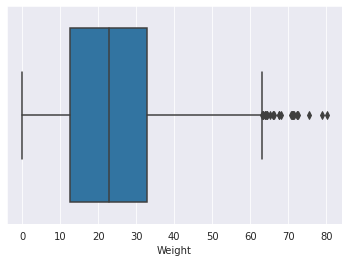

In [17]:
sns.set_style("darkgrid")
sns.boxplot(x = "Weight", data = crab_df)

<AxesSubplot:xlabel='Height'>

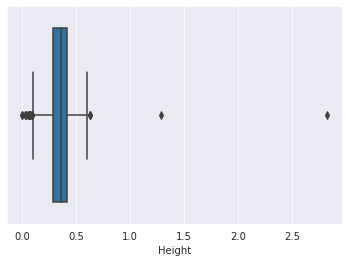

In [18]:
sns.set_style("darkgrid")
sns.boxplot(x = "Height", data = crab_df)

# Preparing data for training

Listing out of all columns 

In [19]:
crab_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

Let us encode Sex column into 0 and 1 for male and female 

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
crab_df['Gender'] = le.fit_transform(crab_df['Sex'])

Since there are 3 genders, let us do one hot encoding

In [21]:
crab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
 9   Gender          3893 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 304.3+ KB


In [22]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
crab_sex_df = pd.DataFrame(onehot.fit_transform(crab_df[['Sex']]).toarray())
crab_df = crab_df.join(crab_sex_df)

In [23]:
crab_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Gender,0,1,2
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,1.0,0.0,0.0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,2,0.0,0.0,1.0
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0.0,1.0,0.0
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,1.0,0.0,0.0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,0,1.0,0.0,0.0
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,1.0,0.0,0.0
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0.0,1.0,0.0
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,1,0.0,1.0,0.0


In [24]:
#Renaming columns 
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
crab_df.rename(columns = {0: "Female", 1: "Intermediate", 2 : "Male"}, inplace = True)

In [25]:
crab_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Gender,Female,Intermediate,Male
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,1.0,0.0,0.0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,2,0.0,0.0,1.0
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0.0,1.0,0.0
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,1.0,0.0,0.0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,0,1.0,0.0,0.0
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,0,1.0,0.0,0.0
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,0.0,1.0,0.0
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,1,0.0,1.0,0.0


#Drop columns of no interest 

In [26]:
crab_df.drop(columns = ["Sex", "Gender"], inplace = True)

In [27]:
crab_df.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Female', 'Intermediate',
       'Male'],
      dtype='object')

In [28]:
X = crab_df[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Female', 'Intermediate',
       'Male']]

y = crab_df["Age"]

# Splitting data 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [30]:
X_train.shape

(3114, 10)

In [31]:
X_test.shape

(779, 10)

In [32]:
y_train.shape

(3114,)

In [33]:
y_test.shape

(779,)

# Training model

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [35]:
lm.intercept_

3.802308741168356

In [36]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
Length,-0.622133
Diameter,4.961933
Height,3.779713
Weight,0.357442
Shucked Weight,-0.726636
Viscera Weight,-0.442120
Shell Weight,0.271032
Female,0.243472
Intermediate,-0.548904
Male,0.305433


# Making predictions using test data

In [37]:
predictions = lm.predict(X_test)

# Model metrics

In [38]:
from sklearn import metrics
print("MEA", metrics.mean_absolute_error(y_test, predictions))

MEA 1.5842563254741837


In [39]:
print("MSE", metrics.mean_squared_error(y_test, predictions))

MSE 4.859145605789453


In [40]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE 2.204346979445263
